In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from tqdm import tqdm

%matplotlib notebook

In [2]:
def getDistanceByPoint(data, model):
    """
    Return Series of distance between each point 
    and his distance with the closest centroid
    """
    distance = pd.Series()
    for i in tqdm(range(0,len(data))):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]= np.linalg.norm(Xa-Xb)
    return distance

# Load Data

In [3]:
df_train = pd.read_csv("train.csv")
df_train.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
df_train.set_index('Date',inplace = True)
df_train = df_train.sort_values(by='Date')

In [6]:
df_train['Avg_Sales'] = df_train['Sales'].rolling(window = 5).mean()

In [7]:
df_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Avg_Sales
Date,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,NaN
2013-01-01,379,2,0,0,0,0,a,1,NaN
2013-01-01,378,2,0,0,0,0,a,1,NaN
2013-01-01,377,2,0,0,0,0,a,1,NaN
2013-01-01,376,2,0,0,0,0,a,1,0.0


In [8]:
df_store = pd.read_csv("store.csv")
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
df_train = pd.merge(df_train,df_store,on = ['Store'])

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
Avg_Sales                    1017205 non-null float64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null 

# Data Exploration

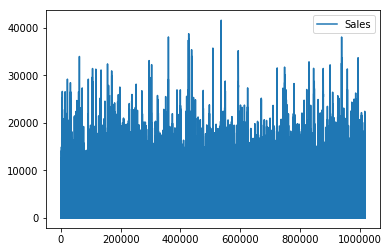

In [12]:
# change the type of timestamp column for plotting
#df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train.plot( y='Sales',use_index=True)

In [13]:
# features = [
#         'Store', 
#         'Customers',
#         'CompetitionDistance', 

# ]

In [16]:
data = df_train.loc[:10000]

# Anomaly Detection

## Using K-means to detect the anomalies.


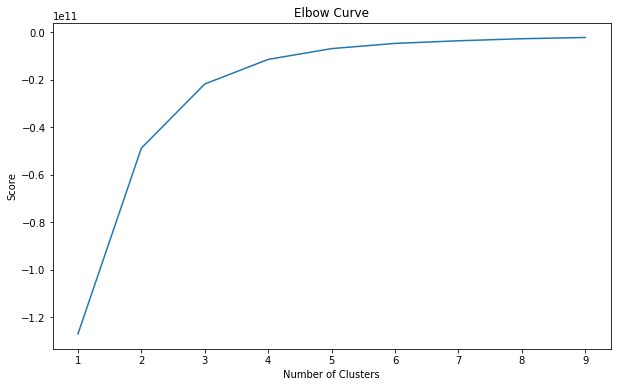

In [17]:
data = data[['Sales','Customers','DayOfWeek']]
n_cluster = range(1, 10)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

Let take 5 as number of clusters

In [18]:
outliers_fraction = 0.01

In [22]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[5])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
data['anomaly21'] = (distance >= threshold).astype(int)


100%|██████████| 10001/10001 [00:12<00:00, 814.75it/s]


In [26]:
print('Number of anomalies: %d'%(data['anomaly21'].sum()))

Number of anomalies: 100
